In [1]:
# new project to be done

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\Amazon.order\Retail.OrderHistory.2.csv')

In [4]:
df

,Website,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,...,Shipment Status,Ship Date,Shipping Option,Shipping Address,Billing Address,Carrier Name & Tracking Number,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details
0,Amazon.in,403-4061090-2234742,2023-05-20T07:55:39Z,Not Applicable,INR,107,0,0.00,0,107,...,Shipped,2023-05-20T08:00:25Z,Not Available,Not Available,Not Available,SVAFN(),Mobile Prepaid Recharge,Not Available,Not Available,Not Available
1,Amazon.in,408-4499906-5542737,2023-05-19T12:25:06Z,Not Applicable,INR,0,0,0.00,0,0,...,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Himanshu Agarwal Near well founded school fort...,Himanshu Agarwal Near well founded school fort...,ATS(324107608021),Red Tape Men's Graphic Print Regular T-Shirt (...,Not Available,Not Available,Not Available
2,Amazon.in,402-2229605-7989932,2023-05-19T08:16:00Z,Not Applicable,INR,"13,134.75","2,364.25",0.00,0,"15,529",...,Shipped,2023-05-19T16:19:15Z,std-in-10k,HOME UG Near jio office Dwarika puri gali no 2...,Himanshu Agarwal Near well founded school fort...,ATS(324108867656),"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1...",Enjoy your gift!\nFrom Himanshu Agarwal,Himanshu Agarwal,Not Available
3,Amazon.in,403-2356268-5985964,2023-05-18T19:52:09Z,Not Applicable,INR,"1,186.5",0,0.00,0,"1,186.5",...,Shipped,2023-05-18T19:55:46Z,Not Available,Not Available,Not Available,SVAFN(),LPG cylinder booking,Not Available,Not Available,Not Available
4,Amazon.in,403-1986641-1421919,2023-05-16T08:46:15Z,Not Applicable,INR,"1,024.58",184.42,0.00,'-910',299,...,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,Himanshu Agarwal Near well founded school fort...,Himanshu Agarwal Near well founded school fort...,ATS(158323259701),beatXP Optifit Glaze Digital Weighing Scale wi...,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Amazon.in,406-8696127-3577937,2018-03-30T11:47:50Z,Not Applicable,INR,150,0,0.00,0,150,...,Shipped,2018-03-30T11:48:45Z,Not Available,Not Available,"Himanshu Agarwal Near well founded school , ki...",SVAFN(),Amazon Pay balance: Money,Not Available,Not Available,Not Available
1449,Amazon.in,407-7781266-0381115,2017-05-14T04:58:54Z,Not Applicable,INR,"1,099",0,0.00,0,0,...,Not Available,Not Available,std-in-cod-eligible,"Himanshu Agarwal Near well founded school , ki...","Himanshu Agarwal Near well founded school , ki...",Not Available,Sony MDR-XB250 On-Ear EXTRA BASS Headphones (B...,Not Available,Not Available,Not Available
1450,Amazon.in,402-2844038-5234708,2015-12-25T19:50:53Z,Not Applicable,INR,253,0,0.00,0,253,...,Not Available,Not Available,std-in-remote-ips-only,Mukesh Agarwal Near SBI bank Branch=Old Gwalio...,Mukesh Agarwal Near SBI bank Branch=Old Gwalio...,Not Available,HP V220W 8GB USB2.0 Pen Drive,Not Available,Not Available,Not Available
1451,Amazon.in,403-0113685-7483530,2015-04-01T15:20:44Z,Not Applicable,INR,95.24,4.76,2.33,0,100,...,Shipped,2015-04-01T20:03:16Z,std-in-remote-cod-eligible-10k,Sunil Goyal near well founded school kilagate ...,Sunil Goyal near well founded school kilagate ...,BLUEDART_EXP_COD(59311723343),Kaira Brand High Quality Clear Transparent Bac...,Not Available,Not Available,Not Available


In [11]:
df.shape

(1453, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order ID                    1453 non-null   object 
 1   Order Date                  1453 non-null   object 
 2   Currency                    1453 non-null   object 
 3   Unit Price                  1453 non-null   object 
 4   Unit Price Tax              1453 non-null   object 
 5   Shipping Charge             1453 non-null   float64
 6   Total Discounts             1453 non-null   object 
 7   Total Owed                  1453 non-null   object 
 8   Shipment Item Subtotal      1453 non-null   object 
 9   Shipment Item Subtotal Tax  1453 non-null   object 
 10  Quantity                    1453 non-null   int64  
 11  Payment Instrument Type     1453 non-null   object 
 12  Order Status                1453 non-null   object 
 13  Shipment Status             1453 

In [13]:
list(df.columns)

['Order ID',
 'Order Date',
 'Currency',
 'Unit Price',
 'Unit Price Tax',
 'Shipping Charge',
 'Total Discounts',
 'Total Owed',
 'Shipment Item Subtotal',
 'Shipment Item Subtotal Tax',
 'Quantity',
 'Payment Instrument Type',
 'Order Status',
 'Shipment Status',
 'Ship Date',
 'Shipping Option',
 'Product Name']

In [7]:
df.drop(['Website','Purchase Order Number','Carrier Name & Tracking Number',
         'Gift Message','Gift Sender Name','Gift Recipient Contact Details','ASIN' ,'Shipping Address',
          'Billing Address','Product Condition'],axis = 1 , inplace = True)

In [8]:
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107,107,0,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,Not Available,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0,0,0,1,Not Available,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,"15,529","13,134.75","2,364.25",1,Not Available,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,"1,186.5","1,186.5",0,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,Not Available,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [9]:
list(df.columns)

['Order ID',
 'Order Date',
 'Currency',
 'Unit Price',
 'Unit Price Tax',
 'Shipping Charge',
 'Total Discounts',
 'Total Owed',
 'Shipment Item Subtotal',
 'Shipment Item Subtotal Tax',
 'Quantity',
 'Payment Instrument Type',
 'Order Status',
 'Shipment Status',
 'Ship Date',
 'Shipping Option',
 'Product Name']

In [14]:
df = df.fillna(0)
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107,107,0,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,Not Available,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0,0,0,1,Not Available,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,"15,529","13,134.75","2,364.25",1,Not Available,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,"1,186.5","1,186.5",0,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,Not Available,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [17]:
df.rename(columns = {'Total Owed':'Total Charged'}, inplace = True)
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Charged,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107,107,0,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,Not Available,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0,0,0,1,Not Available,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,"15,529","13,134.75","2,364.25",1,Not Available,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,"1,186.5","1,186.5",0,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,Not Available,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [23]:
df["Total Charged"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1453 entries, 0 to 1452
Series name: Total Charged
Non-Null Count  Dtype 
--------------  ----- 
1453 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [27]:
df["Total Charged"] = df["Total Charged"].str.replace(',','').astype(float)
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Charged,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107.0,107,0,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,Not Available,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0.0,0,0,1,Not Available,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,15529.0,"13,134.75","2,364.25",1,Not Available,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,1186.5,"1,186.5",0,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,Not Available,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299.0,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [28]:
df["Total Charged"].sum()

1801990.0699999998

In [29]:
df["Total Charged"].mean()

1240.1858706125256

In [32]:
df["Total Charged"].median()

100.0

In [33]:
df["Total Charged"].max()

72600.0

In [34]:
df["Total Charged"].min()

0.0

# for tax

In [43]:
df.rename(columns = {'Shipment Item Subtotal Tax':'Tax Charged'}, inplace = True)
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Charged,Shipment Item Subtotal,Tax Charged,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107.0,107,0,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,Not Available,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0.0,0,0,1,Not Available,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,15529.0,"13,134.75","2,364.25",1,Not Available,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,1186.5,"1,186.5",0,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,Not Available,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299.0,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [46]:
# df['Tax Charged'].where(df['Tax Charged']== 'Not Available',0)
df.replace('Not Available','0',inplace = True)

In [47]:
df['Tax Charged']

0              0
1              0
2       2,364.25
3              0
4         184.42
          ...   
1448           0
1449           0
1450           0
1451        4.76
1452      968.64
Name: Tax Charged, Length: 1453, dtype: object

In [48]:
df["Tax Charged"] = df["Tax Charged"].str.replace(',','').astype(float)
df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Charged,Shipment Item Subtotal,Tax Charged,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.0,0,107.0,107,0.00,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,0,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.0,0,0.0,0,0.00,1,0,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.0,0,15529.0,"13,134.75",2364.25,1,0,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.0,0,1186.5,"1,186.5",0.00,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,0,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.0,'-910',299.0,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...


In [49]:
df["Tax Charged"].sum()

160742.40000000002

In [50]:
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.08920271131127823

In [52]:
# df['Order Date'] = pd.to_datetime(df['Order Date'])
# df.head()

In [65]:
x1 = df['Order Date'].head(25)
y1 = df['Total Charged'].head(25)

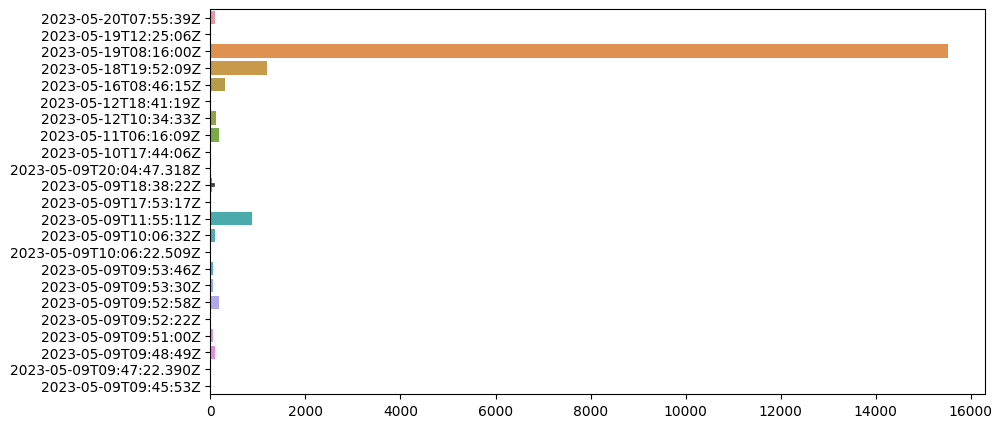

In [66]:
plt.figure(figsize=(10,5)) # figsize = (width,height)
sns.barplot(y= list(x1) , x= list(y1)  , data = df)
plt.show() 

In [68]:
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()

Order Date
2015-03-26T09:58:19Z    8999.0
2015-04-01T15:20:44Z     100.0
2015-12-25T19:50:53Z     253.0
2017-05-14T04:58:54Z       0.0
2018-03-30T11:47:50Z     150.0
Name: Total Charged, dtype: float64

<Axes: xlabel='Order Date'>

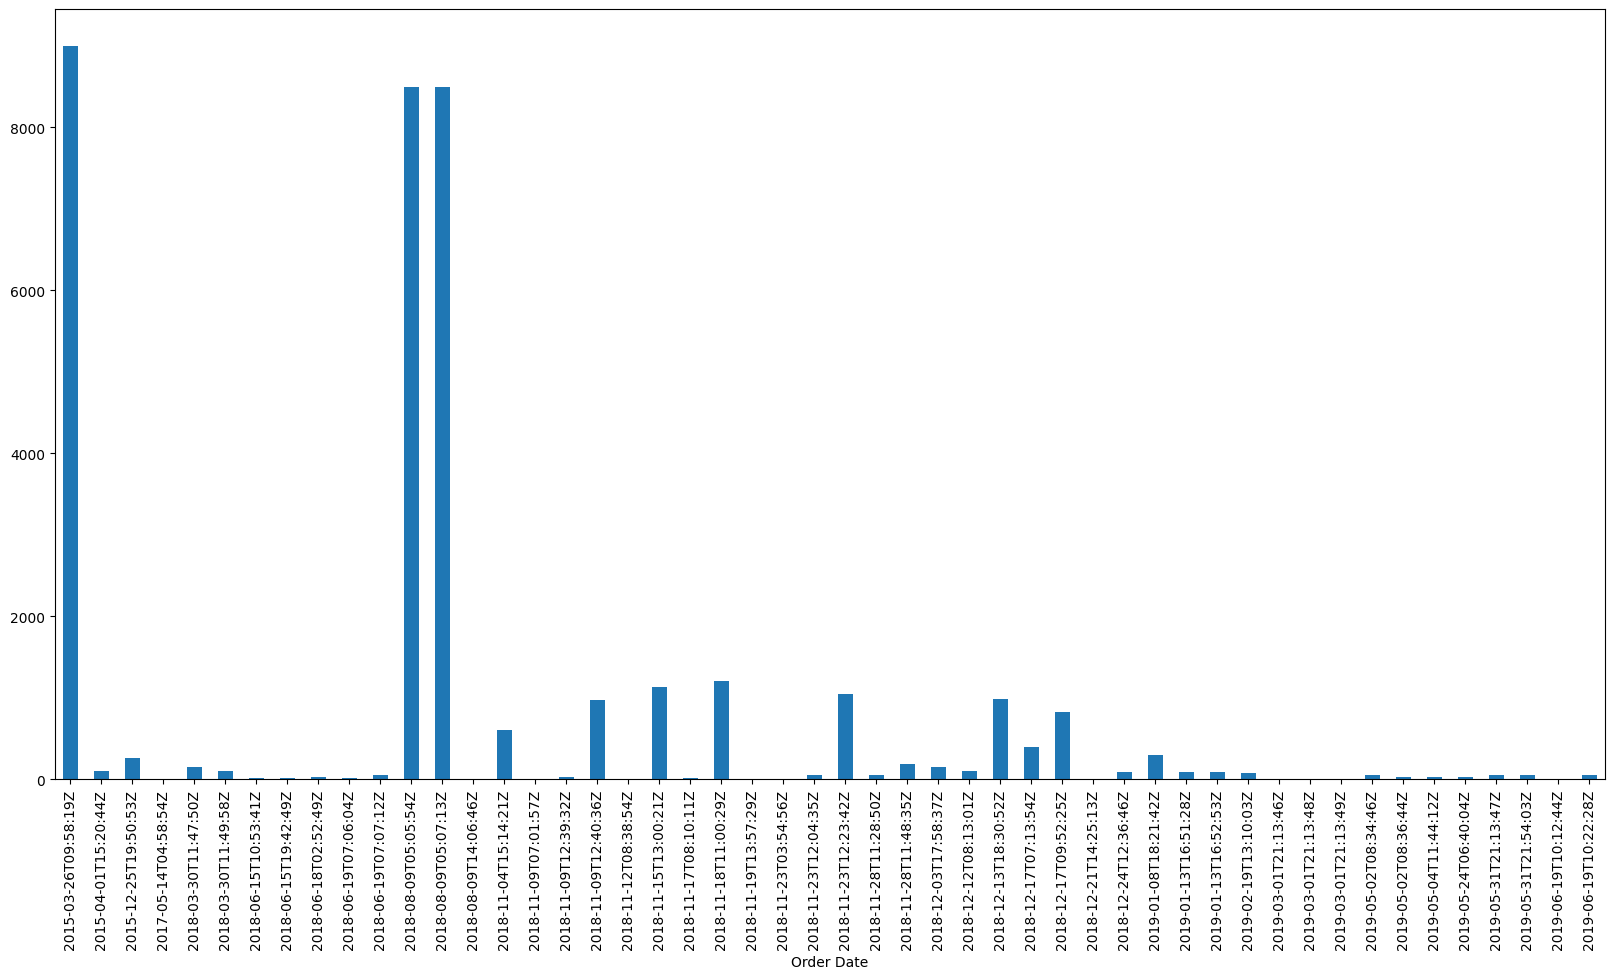

In [71]:
daily_orders.head(50).plot.bar(figsize=(20,10))

# Shipped

In [83]:
shipped = df[df['Shipment Status']=='Shipped']

In [ ]:
df.replace('Shipped and Shipped','Shipped',inplace = True)

In [ ]:
df.replace('Shipped and Shipped and Shipped','Shipped',inplace = True)

In [84]:
shipped['Total Charged'].sum()

1060390.23

In [105]:
df["Total Charged"].sum() - shipped_Not['Total Charged'].sum()

1060390.2299999997

In [85]:
df['Shipment Status'].unique()

array(['Shipped', '0'], dtype=object)

# Not Shipped

In [87]:
shipped_Not = df[df['Shipment Status']=='0']

In [88]:
shipped_Not['Total Charged'].sum()

741599.8400000001

# Confirm Order graph of Date and Payment

In [106]:
df

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Charged,Shipment Item Subtotal,Tax Charged,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,403-4061090-2234742,2023-05-20T07:55:39Z,INR,107,0,0.00,0,107.0,107,0.00,1,Gift Certificate/Card,Closed,Shipped,2023-05-20T08:00:25Z,0,Mobile Prepaid Recharge
1,408-4499906-5542737,2023-05-19T12:25:06Z,INR,0,0,0.00,0,0.0,0,0.00,1,0,Closed,Shipped,2023-05-19T14:06:36Z,std-in-buyback-cod-eligible,Red Tape Men's Graphic Print Regular T-Shirt (...
2,402-2229605-7989932,2023-05-19T08:16:00Z,INR,"13,134.75","2,364.25",0.00,0,15529.0,"13,134.75",2364.25,1,0,Closed,Shipped,2023-05-19T16:19:15Z,std-in-10k,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1..."
3,403-2356268-5985964,2023-05-18T19:52:09Z,INR,"1,186.5",0,0.00,0,1186.5,"1,186.5",0.00,1,Gift Certificate/Card,Closed,Shipped,2023-05-18T19:55:46Z,0,LPG cylinder booking
4,403-1986641-1421919,2023-05-16T08:46:15Z,INR,"1,024.58",184.42,0.00,'-910',299.0,"1,024.58",184.42,1,Gift Certificate/Card,Closed,Shipped,2023-05-16T10:54:11Z,next-in-grd-cod-eligible,beatXP Optifit Glaze Digital Weighing Scale wi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,406-8696127-3577937,2018-03-30T11:47:50Z,INR,150,0,0.00,0,150.0,150,0.00,1,0,Closed,Shipped,2018-03-30T11:48:45Z,0,Amazon Pay balance: Money
1449,407-7781266-0381115,2017-05-14T04:58:54Z,INR,"1,099",0,0.00,0,0.0,0,0.00,0,0,Cancelled,0,0,std-in-cod-eligible,Sony MDR-XB250 On-Ear EXTRA BASS Headphones (B...
1450,402-2844038-5234708,2015-12-25T19:50:53Z,INR,253,0,0.00,0,253.0,0,0.00,0,0,Cancelled,0,0,std-in-remote-ips-only,HP V220W 8GB USB2.0 Pen Drive
1451,403-0113685-7483530,2015-04-01T15:20:44Z,INR,95.24,4.76,2.33,0,100.0,95.24,4.76,1,0,Closed,Shipped,2015-04-01T20:03:16Z,std-in-remote-cod-eligible-10k,Kaira Brand High Quality Clear Transparent Bac...


In [107]:
daily_orders1 = shipped.groupby('Order Date').sum()["Total Charged"]
daily_orders1.head()

Order Date
2015-03-26T09:58:19Z    8999.0
2015-04-01T15:20:44Z     100.0
2018-03-30T11:47:50Z     150.0
2018-03-30T11:49:58Z     100.0
2018-06-15T10:53:41Z      10.0
Name: Total Charged, dtype: float64

### Graph of All Orders

#### From Year 2015 to 2023

<Axes: xlabel='Order Date'>

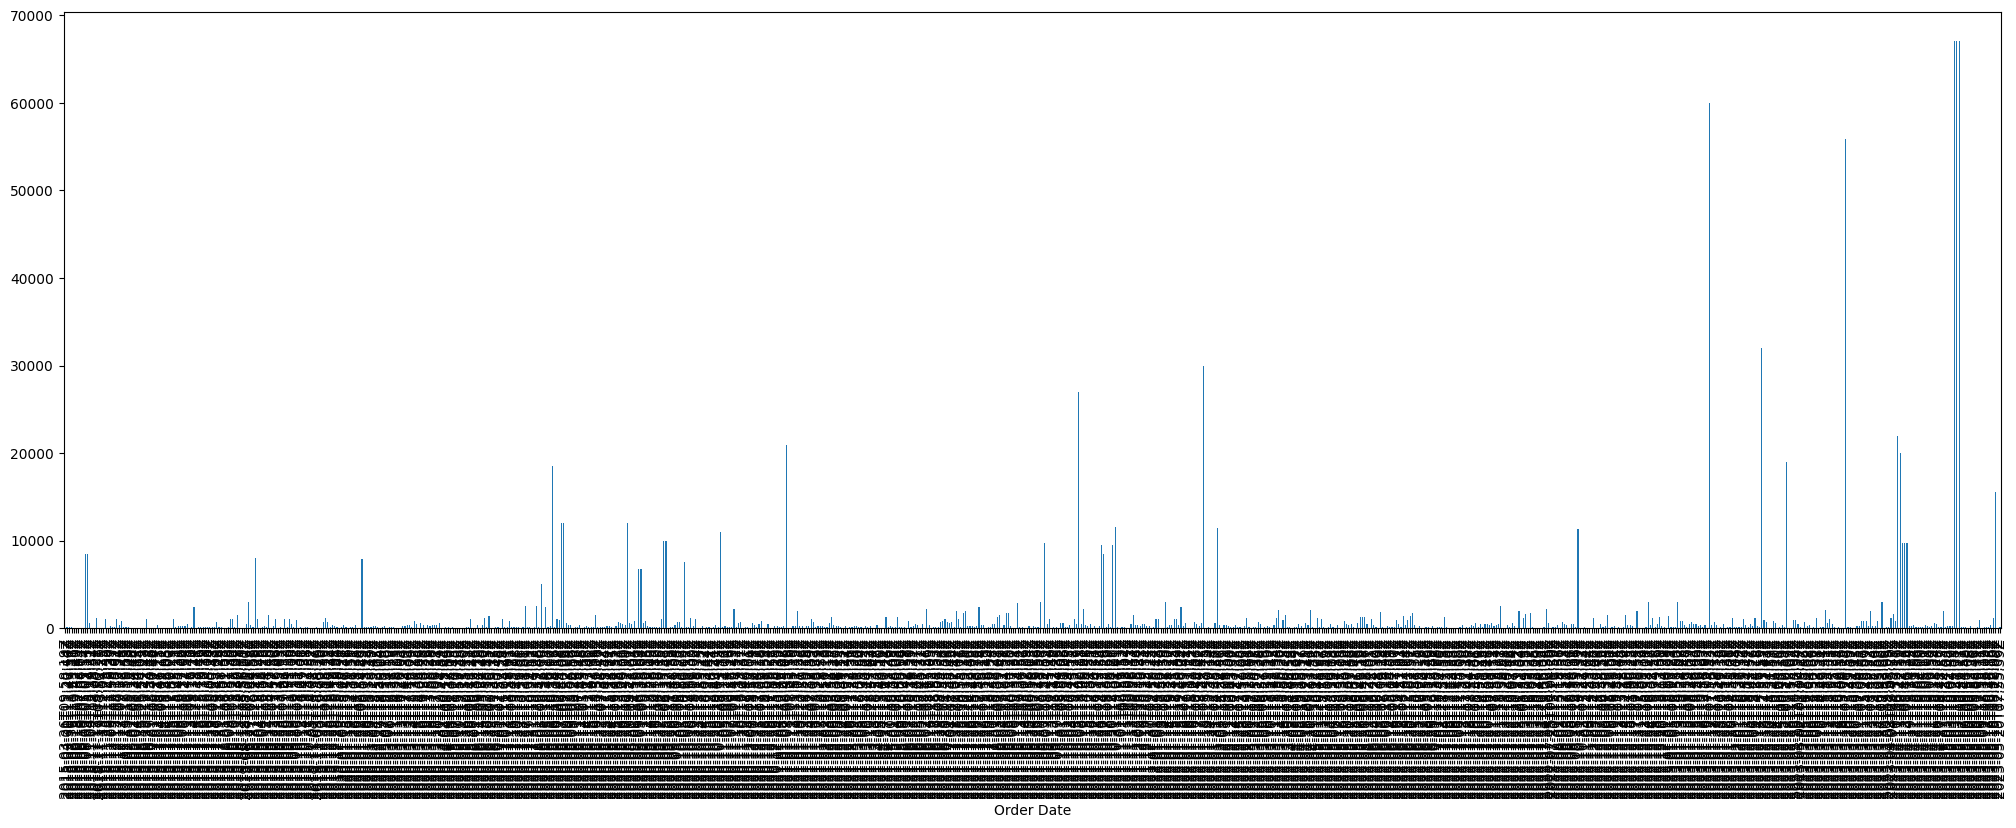

In [113]:
daily_orders1.plot.bar(figsize=(25,8))

### Graph of Starting 4 Years

#### From   26-03-2015   to   29-09-2019

<Axes: xlabel='Order Date'>

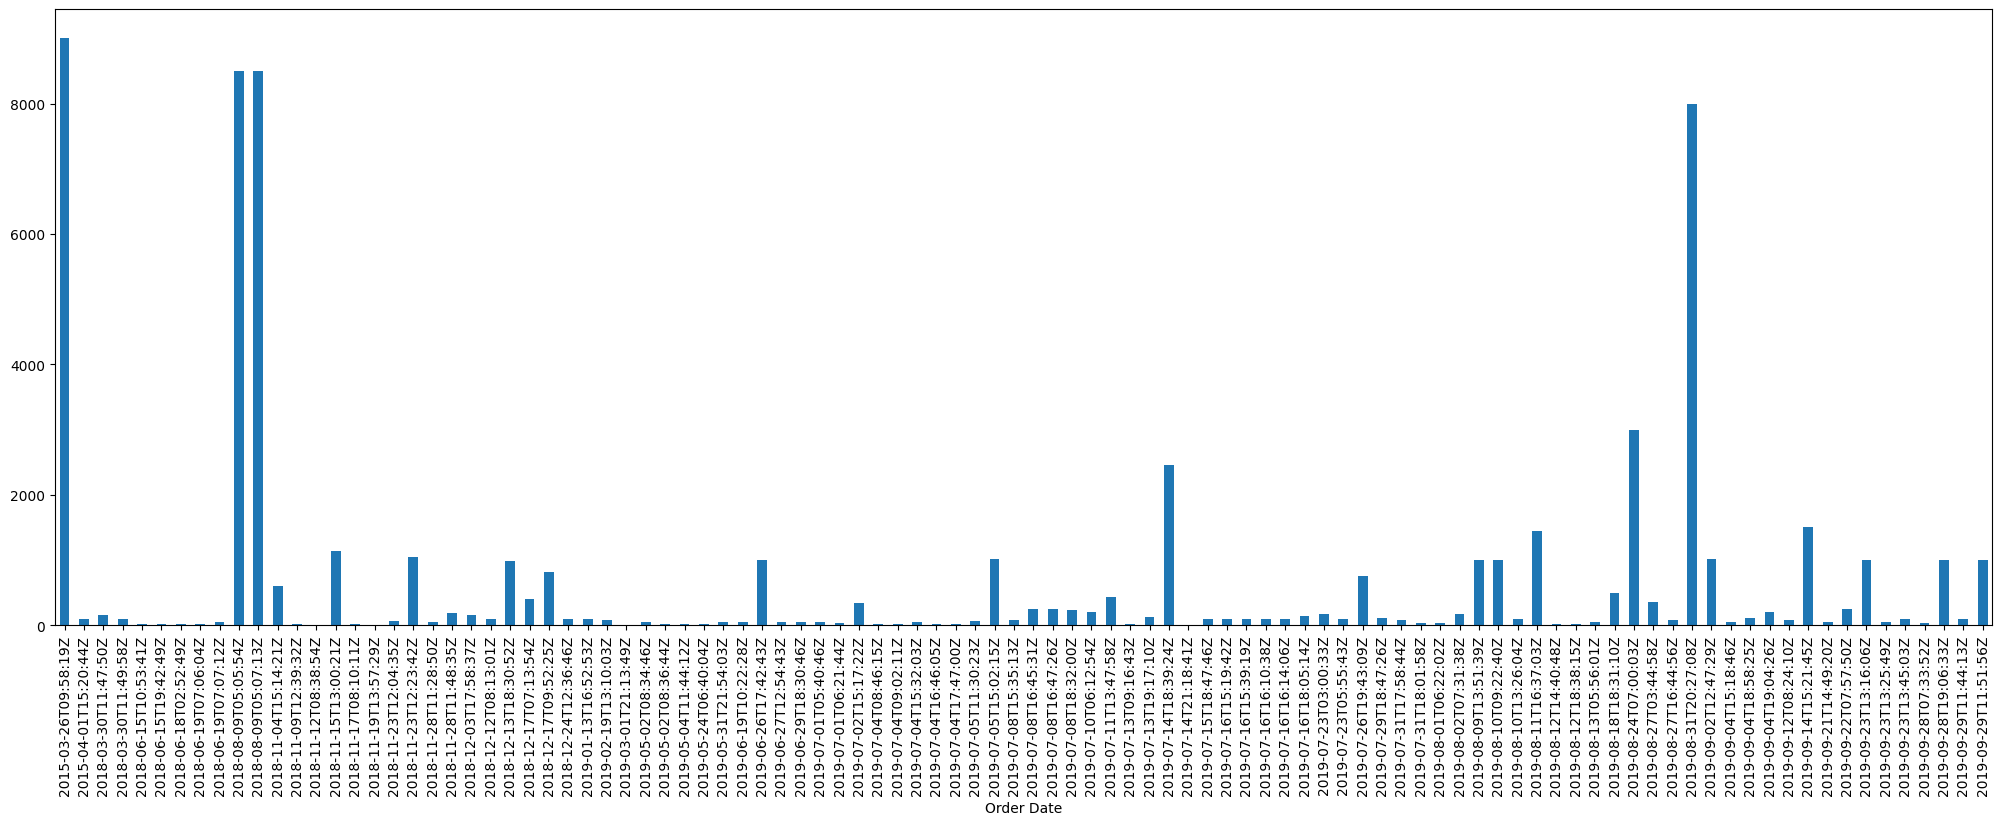

In [103]:
daily_orders1.head(100).plot.bar(figsize=(25,8))

### Graph of Last 1 Years

#### From 28-12-2022  to  20-05-2023

<Axes: xlabel='Order Date'>

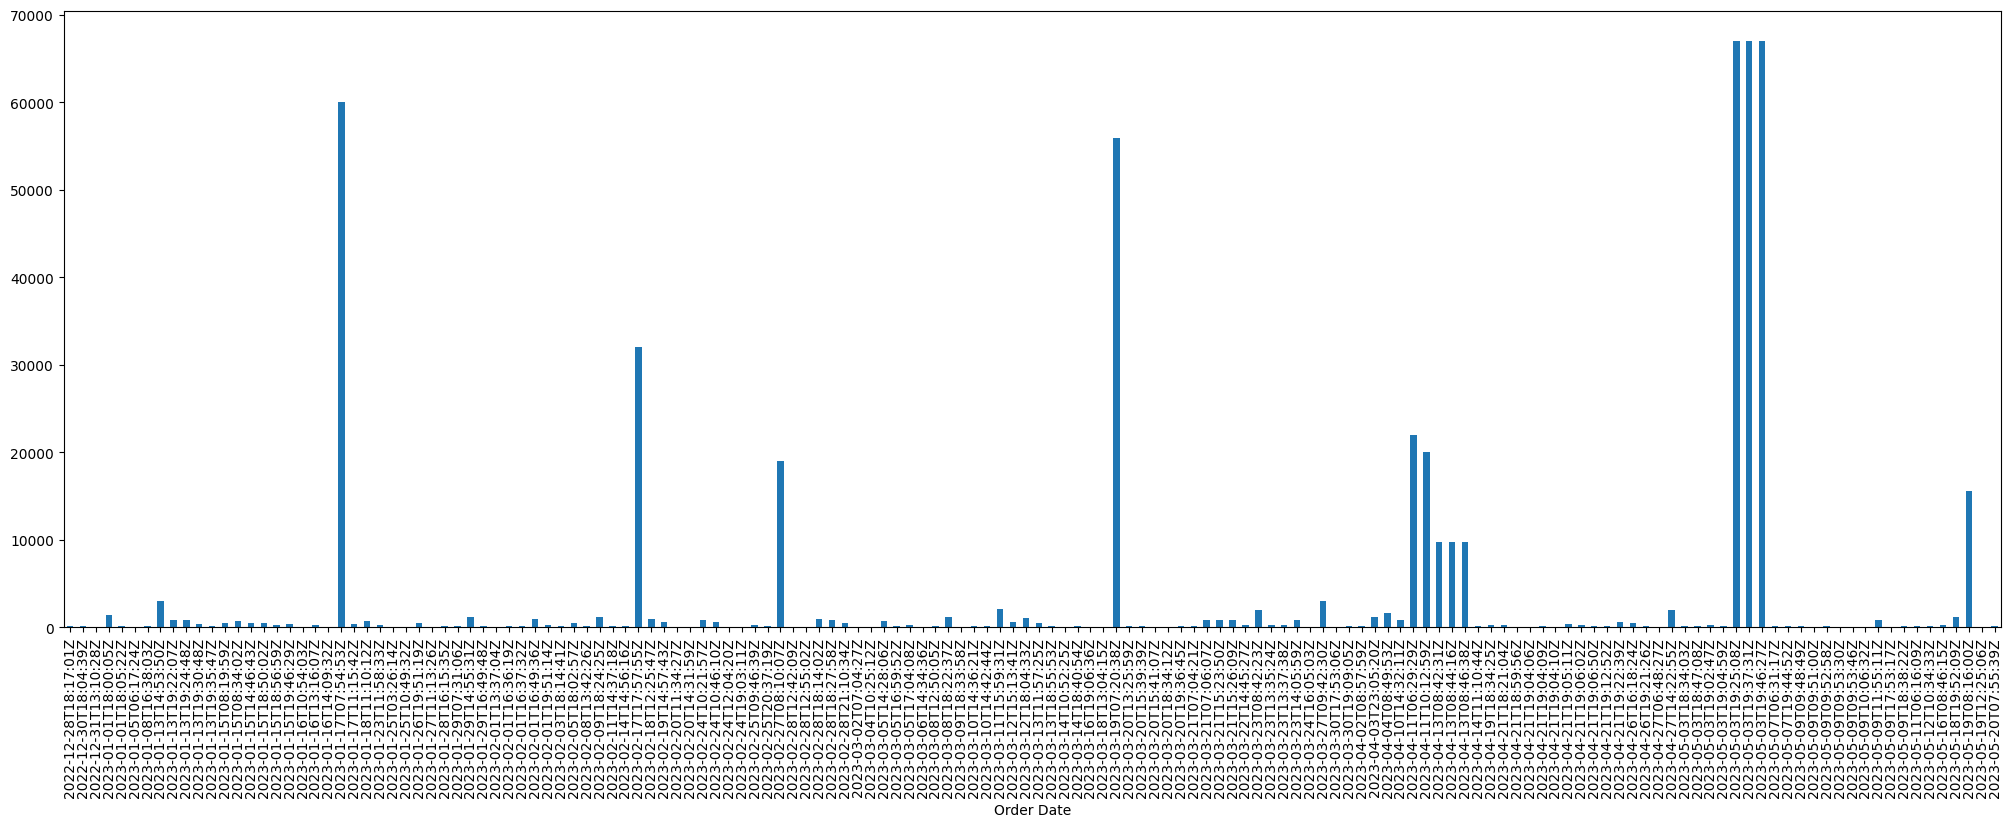

In [109]:
daily_orders1.tail(150).plot.bar(figsize=(25,8))